In [30]:
using Championetal2023, Plots, SparseArrays, StatsBase, Statistics, Random

# Figure 6B

6119.876962 seconds (680.06 M allocations: 4.019 TiB, 19.08% gc time)


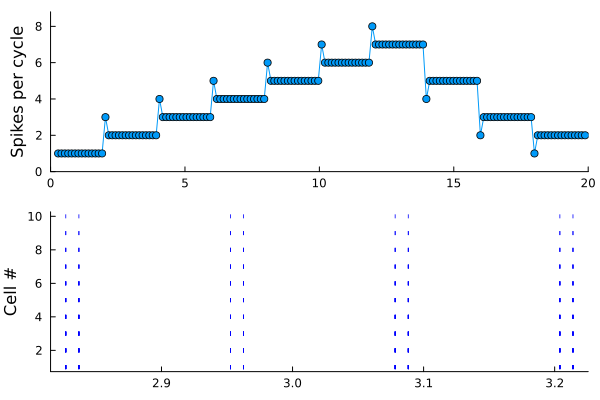

In [31]:
heights = [0.1125, 0.125, 0.1375, 0.135, 0.175, 0.175, 0.175, -0.175, -0.175, -0.175]
starts = [100, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000]
durations = 100*ones(length(starts))

thisdict = Dict([
        ("g_Na", 35.0), #mS/cm2
        ("g_K", 9.0), #mS/cm2
        ("g_L", 0.5), #mS/cm2
        ("E_Na", 55.0), #mV
        ("phi", 15.0),
        ("E_K", -90.0), #mV
        ("C_m", 0.333), #μF/cm2
        ("E_L", -65.0), #mV
        ("tau_syn", 150), #ms
        ("w_EE", 1.0), #mV
        ("spike_threshold", 0.0), # mV

        ("nnodes", 1000), #number of network nodes
        ("simtype", :alltoall), #type of simulation

        ("weightssigma", 0.0),

        ("noisesigma", 0.0), #
        ("tau_n", 500.0), #ms
        ("gammasigma", 0.0), #
        ("tau_n_gamma", 500), #
        ("omegasigma", 0.0), #
        ("tau_n_omega", 500), #

        ("gamma_I_t", -0.5), #uA/cm2
        ("omega_I_t", 0.05), #  #1/ms
        ("g_syn", 5.5), #mS/cm2
        ("I_O", 3.515), #uA/cm2

        ("pulsestarts", starts), # ms
        ("pulseheights", heights), #uA/cm2
        ("pulsedurations", durations), # ms

        ("dt", 0.01),
        ("tmax", 20000),
        ("downsamplespacing", 100)

        ])

@time tvals, sim = oscintegrator_sim(thisdict)

#For rasters: ########################################################
nrasters = 10;
yvals = 1:nrasters
cellsample = rand(1:thisdict["nnodes"], nrasters)
magnifywindowL = 2750 
magnifywindowR = 3250 
rasterstorageheights = NaN*ones(1000, length(cellsample))
rasterstoragetimes = NaN*ones(1000, length(cellsample))
rasterplot = plot(ylabel="Cell #",grid=false, legend=false)
for (i, val) in enumerate(cellsample)
    tempspikes = nonzeros(sim.spikes_mat[val,:])
    if length(tempspikes) > 4 && maximum(tempspikes) > magnifywindowR
        tempspikes2 = tempspikes[findfirst(x->x>magnifywindowL,tempspikes):findfirst(x->x>magnifywindowR, tempspikes)-1]
        rasterstorageheights[1:length(tempspikes2),i] = yvals[i]*ones(length(tempspikes2))
        rasterstoragetimes[1:length(tempspikes2),i] = tempspikes2./1000
    end
    scatter!(rasterplot, rasterstoragetimes,  rasterstorageheights, markershape=:vline, markersize=2, color = :blue)
end
#######################################

#For Spikes Per Cycle Plot: #############################################
myedges = getedges(thisdict["omega_I_t"], thisdict["tmax"])
spikestatstorage = zeros(thisdict["nnodes"], length(myedges)-1)

for i in 1:thisdict["nnodes"]
    tempspikes = nonzeros(sim.spikes_mat[i,:])
    spikestatstorage[i, :] = fit(Histogram, tempspikes, myedges, closed = :right).weights
end

meanvect = zeros(size(spikestatstorage,2))
for i in 1:size(spikestatstorage, 2)
    meanvect[i] = mean(spikestatstorage[:, i])
end


spcplot = plot(  size = (500, 150),
                ylabel="Spikes per cycle",
                grid=false, legend=false,
                xlims=(0,thisdict["tmax"]/1000),
                ylims=(0,maximum(meanvect)+0.1*maximum(meanvect))
                )
plot!(spcplot, myedges[3:end]./1000, meanvect[2:end], marker=true)
#################################

plot(spcplot, rasterplot, layout = (2,1))

# Figure 6C

10777.610639 seconds (695.73 M allocations: 6.335 TiB, 13.22% gc time)


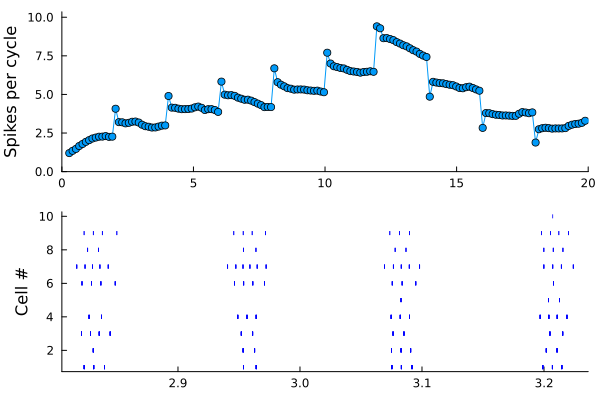

In [32]:
heights = 0.5*[0.2, 0.25, 0.25, 0.275, 0.35, 0.35, 0.4, -0.35, -0.35, -0.35]
starts = [100, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000]
durations = 100*ones(length(starts))

thisdict = Dict([
        ("g_Na", 35.0), #mS/cm2
        ("g_K", 9.0), #mS/cm2
        ("g_L", 0.5), #mS/cm2
        ("E_Na", 55.0), #mV
        ("phi", 15.0),
        ("E_K", -90.0), #mV
        ("C_m", 0.333), #μF/cm2
        ("E_L", -65.0), #mV
        ("tau_syn", 150), #ms
        ("w_EE", 1.0), #mV
        ("spike_threshold", 0.0), # mV

        ("nnodes", 1000), #number of network nodes
        ("simtype", :alltoall), #type of simulation

        ("weightssigma", 0.0), 

        ("noisesigma", 0.1), 
        ("tau_n", 500.0), #5), #ms
        ("gammasigma", 0.0), 
        ("tau_n_gamma", 500), 
        ("omegasigma", 0.0), 
        ("tau_n_omega", 500), 

        ("gamma_I_t", -0.5), #uA/cm2
        ("omega_I_t", 0.05), #  #1/ms
        ("g_syn", 5.5), #mS/cm2
        ("I_O", 3.515), #uA/cm2 

        ("pulsestarts", starts), # ms
        ("pulseheights", heights), #uA/cm2
        ("pulsedurations", durations), # ms

        ("dt", 0.01),
        ("tmax", 20000),
        ("downsamplespacing", 100),

        ]
)

@time tvals, sim = oscintegrator_sim(thisdict)

#For rasters: ########################################################
nrasters = 10;
yvals = 1:nrasters
cellsample = rand(1:thisdict["nnodes"], nrasters)
magnifywindowL = 2750 
magnifywindowR = 3250 
rasterstorageheights = NaN*ones(1000, length(cellsample))
rasterstoragetimes = NaN*ones(1000, length(cellsample))
rasterplot = plot(ylabel="Cell #",grid=false, legend=false)
for (i, val) in enumerate(cellsample)
    tempspikes = nonzeros(sim.spikes_mat[val,:])
    if length(tempspikes) > 4 && maximum(tempspikes) > magnifywindowR
        tempspikes2 = tempspikes[findfirst(x->x>magnifywindowL,tempspikes):findfirst(x->x>magnifywindowR, tempspikes)-1]
        rasterstorageheights[1:length(tempspikes2),i] = yvals[i]*ones(length(tempspikes2))
        rasterstoragetimes[1:length(tempspikes2),i] = tempspikes2./1000
    end
    scatter!(rasterplot, rasterstoragetimes,  rasterstorageheights, markershape=:vline, markersize=2, color = :blue)
end
#######################################

#For Spikes Per Cycle Plot: #############################################
myedges = getedges(thisdict["omega_I_t"], thisdict["tmax"])
spikestatstorage = zeros(thisdict["nnodes"], length(myedges)-1)

for i in 1:thisdict["nnodes"]
    tempspikes = nonzeros(sim.spikes_mat[i,:])
    spikestatstorage[i, :] = fit(Histogram, tempspikes, myedges, closed = :right).weights
end

meanvect = zeros(size(spikestatstorage,2))
for i in 1:size(spikestatstorage, 2)
    meanvect[i] = mean(spikestatstorage[:, i])
end


spcplot = plot(  size = (500, 150),
                ylabel="Spikes per cycle",
                grid=false, legend=false,
                xlims=(0,thisdict["tmax"]/1000),
                ylims=(0,maximum(meanvect)+0.1*maximum(meanvect))
                )
plot!(spcplot, myedges[3:end]./1000, meanvect[2:end], marker=true)
#################################

plot(spcplot, rasterplot, layout = (2,1))

# Figure 6D

10660.112206 seconds (681.70 M allocations: 6.204 TiB, 12.11% gc time)


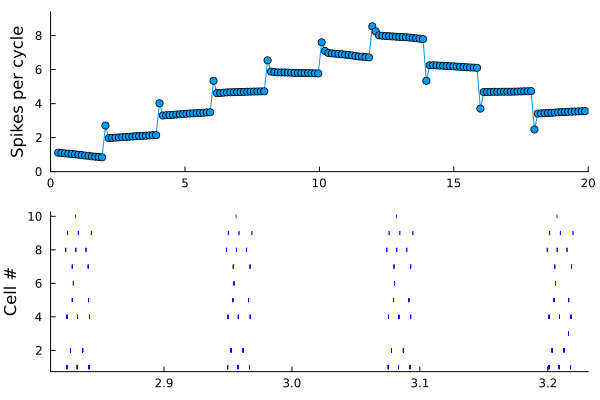

In [41]:
heights = 0.5*[0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, -0.35, -0.35, -0.35] 
starts = [100, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000]
durations = 100*ones(length(starts))

thisdict = Dict([
        ("g_Na", 35.0), #mS/cm2
        ("g_K", 9.0), #mS/cm2
        ("g_L", 0.5), #mS/cm2
        ("E_Na", 55.0), #mV
        ("phi", 15.0),
        ("E_K", -90.0), #mV
        ("C_m", 0.333), #μF/cm2
        ("E_L", -65.0), #mV
        ("tau_syn", 150), #ms
        ("w_EE", 1.0), #mV
        ("spike_threshold", 0.0), # mV

        ("nnodes", 1000), #number of network nodes
        ("simtype", :alltoall), #type of simulation

        ("weightssigma", 0.01), #Scale factor is vestige of old code. This gets multiplied by g_syn

        ("noisesigma", 0.0), 
        ("tau_n", 500.0), #5), #ms
        ("gammasigma", 0.0), 
        ("tau_n_gamma", 500), 
        ("omegasigma", 0.0), 
        ("tau_n_omega", 500), 

        ("gamma_I_t", -0.5), #uA/cm2
        ("omega_I_t", 0.05), #  #1/ms
        ("g_syn", 5.5), #mS/cm2
        ("I_O", 3.515), #uA/cm2 

        ("pulsestarts", starts), # ms
        ("pulseheights", heights), #uA/cm2
        ("pulsedurations", durations), # ms

        ("dt", 0.01),
        ("tmax", 20000),
        ("downsamplespacing", 100),

        ]
)

@time tvals, sim = oscintegrator_sim(thisdict)

#For rasters: ########################################################
nrasters = 10;
yvals = 1:nrasters
cellsample = rand(1:thisdict["nnodes"], nrasters)
magnifywindowL = 2750 
magnifywindowR = 3250 
rasterstorageheights = NaN*ones(1000, length(cellsample))
rasterstoragetimes = NaN*ones(1000, length(cellsample))
rasterplot = plot(ylabel="Cell #",grid=false, legend=false)
for (i, val) in enumerate(cellsample)
    tempspikes = nonzeros(sim.spikes_mat[val,:])
    if length(tempspikes) > 4 && maximum(tempspikes) > magnifywindowR
        tempspikes2 = tempspikes[findfirst(x->x>magnifywindowL,tempspikes):findfirst(x->x>magnifywindowR, tempspikes)-1]
        rasterstorageheights[1:length(tempspikes2),i] = yvals[i]*ones(length(tempspikes2))
        rasterstoragetimes[1:length(tempspikes2),i] = tempspikes2./1000
    end
    scatter!(rasterplot, rasterstoragetimes,  rasterstorageheights, markershape=:vline, markersize=2, color = :blue)
end
#######################################

#For Spikes Per Cycle Plot: #############################################
myedges = getedges(thisdict["omega_I_t"], thisdict["tmax"])
spikestatstorage = zeros(thisdict["nnodes"], length(myedges)-1)

for i in 1:thisdict["nnodes"]
    tempspikes = nonzeros(sim.spikes_mat[i,:])
    spikestatstorage[i, :] = fit(Histogram, tempspikes, myedges, closed = :right).weights
end

meanvect = zeros(size(spikestatstorage,2))
for i in 1:size(spikestatstorage, 2)
    meanvect[i] = mean(spikestatstorage[:, i])
end


spcplot = plot(  size = (500, 150),
                ylabel="Spikes per cycle",
                grid=false, legend=false,
                xlims=(0,thisdict["tmax"]/1000),
                ylims=(0,maximum(meanvect)+0.1*maximum(meanvect))
                )
plot!(spcplot, myedges[3:end]./1000, meanvect[2:end], marker=true)
#################################

plot(spcplot, rasterplot, layout = (2,1))